In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()
%matplotlib inline

In [3]:
import psycopg2


postgresDb = psycopg2.connect(
    host="localhost",
    database="postgres",
    user="postgres",
    password="admin")

In [4]:
class Stockdatadao:
    def __init__(self, db):
        self.db = db

    def select(self, symbol):
        cursor = self.db.cursor()
        sql = """SELECT date_time, open, high, low, close, volume, adj_close
                    FROM stock_data WHERE symbol = %s"""
        val = (symbol,)

        cursor.execute(sql, val)
        result = cursor.fetchall()
        list_stock_data = []

        for item in result:
            list_stock_data.append(
                StockDataViewModel(date_time=item[0], open=item[1], high=item[2], low=item[3],
                                   close=item[4], volume=item[5], adj_close=item[6]))

        cursor.close()
        if result is None:
            return None
        else:
            return list_stock_data


class StockDataViewModel:
    def __init__(self, date_time, open, high, low, close, volume, adj_close):
        self.date_time = date_time
        self.open = open
        self.high = high
        self.low = low
        self.close = close
        self.volume = volume
        self.adj_close = adj_close

    def to_dict(self):
        return {
            'date_time': self.date_time,
            'open': self.open,
            'high': self.high,
            'low': self.low,
            'close': self.close,
            'volume': self.volume,
            'adj_close': self.adj_close
        }

In [5]:
# stock_data_dao = Stockdatadao(postgresDb)
#
# stock_data = stock_data_dao.select('AAPL')

df = pd.read_csv("/mnt/learning/last_project/fetch_data_stock/input/test.csv")

df = df.rename(columns={'date_time': 'date'})

df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.sort_index(inplace=True)
df['volume'] = df['volume'].astype(float)
print(df.head(10))

           symbol      high       low      open     close  adj_close  \
date                                                                   
1980-12-12   AAPL  0.128906  0.128348  0.128348  0.128348   0.099584   
1980-12-15   AAPL  0.122210  0.121652  0.122210  0.121652   0.094388   
1980-12-16   AAPL  0.113281  0.112723  0.113281  0.112723   0.087461   
1980-12-17   AAPL  0.116071  0.115513  0.115513  0.115513   0.089625   
1980-12-18   AAPL  0.119420  0.118862  0.118862  0.118862   0.092224   
1980-12-19   AAPL  0.126674  0.126116  0.126116  0.126116   0.097852   
1980-12-22   AAPL  0.132813  0.132254  0.132254  0.132254   0.102614   
1980-12-23   AAPL  0.138393  0.137835  0.137835  0.137835   0.106945   
1980-12-24   AAPL  0.145647  0.145089  0.145089  0.145089   0.112573   
1980-12-26   AAPL  0.159040  0.158482  0.158482  0.158482   0.122964   

                 volume    tema_8    tema_2  tema_100  
date                                                   
1980-12-12  469033600.0

In [6]:
###get the dataset of AAPL stock from 2013-01-01 to 2023-06-01 from df
df = df.loc['2013-01-01':'2023-06-29']

print(df.last('3D'))

           symbol        high         low        open       close   adj_close  \
date                                                                            
2023-06-27   AAPL  188.389999  185.669998  185.889999  188.059998  188.059998   
2023-06-28   AAPL  189.899994  187.600006  187.929993  189.250000  189.250000   
2023-06-29   AAPL  190.070007  188.940002  189.080002  189.589996  189.589996   

                volume      tema_8      tema_2    tema_100  
date                                                        
2023-06-27  50730800.0  187.280043  187.899925  186.613868  
2023-06-28  51216800.0  188.520011  189.282870  187.265740  
2023-06-29  46126000.0  189.378587  189.651317  187.904492  


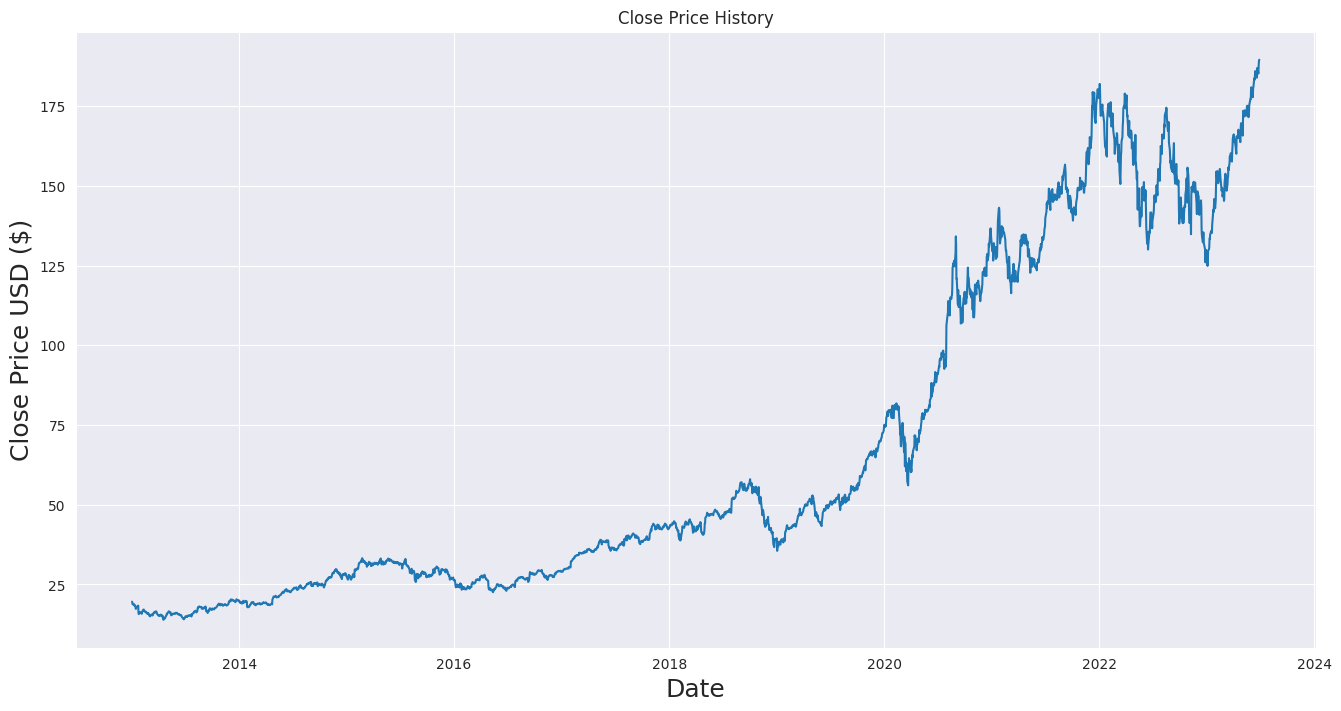

In [7]:
###plot the close price history of AAPL stock from 2013-01-01 to 2023-06-01 from df using matplotlib

plt.figure(figsize=(16, 8))
plt.title('Close Price History')
plt.plot(df['close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [8]:
#adding a field to the data set for calculating the mean of high and low price in df

df['Mean'] = (df['high'] + df['low']) / 2.0

df.head(2)

,symbol,high,low,open,close,adj_close,volume,tema_8,tema_2,tema_100,Mean
date,,,,,,,,,,,
2013-01-02,AAPL,19.821428,19.343929,19.779285,19.608213,16.813864,560518000.0,19.165176,19.614560,18.781241,19.582679
2013-01-03,AAPL,19.631071,19.321428,19.567142,19.360714,16.601629,352965200.0,19.356777,19.403033,18.750542,19.476250


In [9]:
df = df.drop(columns =['tema_2', 'tema_8'])
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2641 entries, 2013-01-02 to 2023-06-29
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   symbol     2641 non-null   object 
 1   high       2641 non-null   float64
 2   low        2641 non-null   float64
 3   open       2641 non-null   float64
 4   close      2641 non-null   float64
 5   adj_close  2641 non-null   float64
 6   volume     2641 non-null   float64
 7   tema_100   2641 non-null   float64
 8   Mean       2641 non-null   float64
dtypes: float64(8), object(1)
memory usage: 206.3+ KB


In [10]:
#We need to restructure the data set by adding a target column ‘Actual’, which will the stock prices for the next day.

steps=-1
dataset_for_prediction = df.copy()
dataset_for_prediction['Actual'] = dataset_for_prediction['close'].shift(steps)
dataset_for_prediction.head(3)

,symbol,high,low,open,close,adj_close,volume,tema_100,Mean,Actual
date,,,,,,,,,,
2013-01-02,AAPL,19.821428,19.343929,19.779285,19.608213,16.813864,560518000.0,18.781241,19.582679,19.360714
2013-01-03,AAPL,19.631071,19.321428,19.567142,19.360714,16.601629,352965200.0,18.750542,19.476250,18.821428
2013-01-04,AAPL,19.236786,18.779642,19.177500,18.821428,16.139196,594333600.0,18.690391,19.008214,18.710714


In [11]:
##dropping columns with null values in dataset_for_prediction

dataset_for_prediction = dataset_for_prediction.dropna()

Text(0.5, 1.0, ' Apple Stock Value')

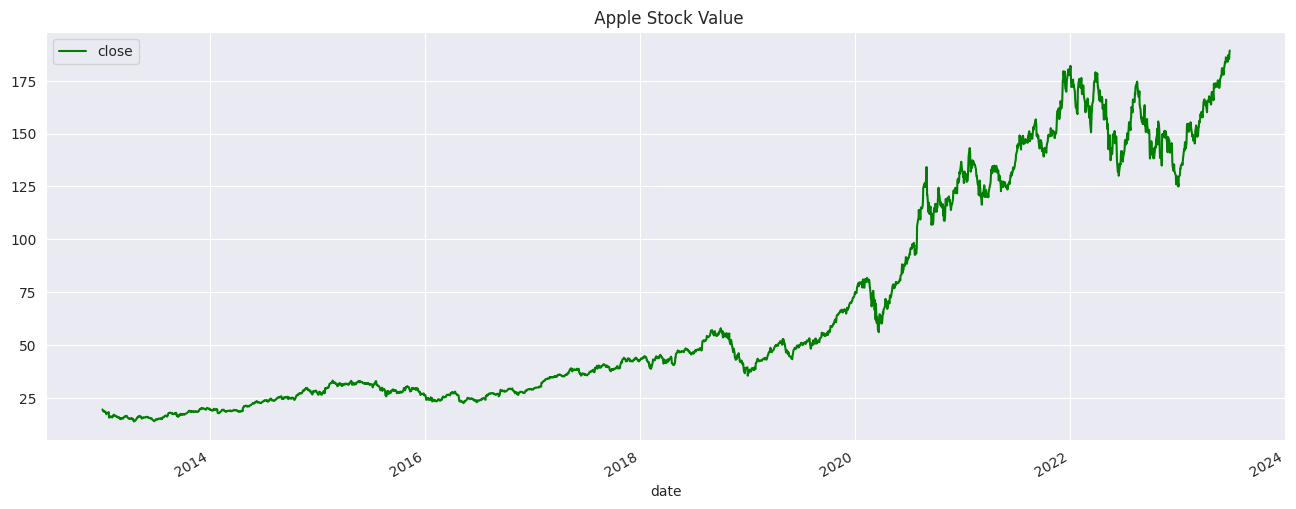

In [12]:
#plot the mean stock prices for the current dataset and lock the trends from df

dataset_for_prediction['close'].plot(color='green', figsize=(16, 6))
plt.legend(['close'])
plt.title(" Apple Stock Value")

Text(0.5, 1.0, ' Apple Stock Volume')

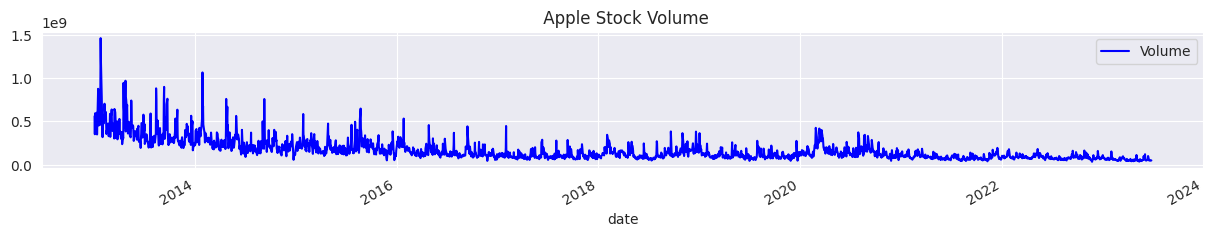

In [13]:
#Plotting volume of Apple stocks sold daily from df

dataset_for_prediction['volume'].plot(color='blue', figsize=(15, 2))
plt.legend(['Volume'])
plt.title(" Apple Stock Volume")

In [14]:
#Normalizing the input and target features
#Since the stock prices and volume are on a different scale, we need to normalize the data. We use MinMaxScaler; it will scale the data to a fixed range between 0 to 1
# Scaling the input features- Low, High, Open, Close, Volume, Adjusted Close, and Mean

# from sklearn.preprocessing import MinMaxScaler
#
# scaler = MinMaxScaler(feature_range=(0, 1))
# scaled_input = scaler.fit_transform(dataset_for_prediction[['low', 'high', 'open', 'close', 'volume', 'adj_close', 'Mean']])
# scaled_input = pd.DataFrame(scaled_input) df = df.loc['2013-01-01':'2023-06-29']

X = dataset_for_prediction[['low', 'high', 'open', 'close', 'volume', 'adj_close', 'Mean', 'tema_100']].loc['2013-01-01':'2022-12-31']
X.last('3D')

,low,high,open,close,volume,adj_close,Mean,tema_100
date,,,,,,,,
2022-12-28,125.870003,131.029999,129.669998,126.040001,85438400.0,125.674026,128.450001,137.413838
2022-12-29,127.730003,130.479996,127.989998,129.610001,75703700.0,129.233658,129.105000,136.731060
2022-12-30,127.430000,129.949997,128.410004,129.929993,77034200.0,129.552719,128.689999,136.097171


In [15]:
#Get the dataset for validation from df

df_for_validation = dataset_for_prediction[['low', 'high', 'open', 'close', 'volume', 'adj_close', 'Mean', 'tema_100']].loc['2023-01-01':'2023-06-30']
df_for_validation.head(3)

,low,high,open,close,volume,adj_close,Mean,tema_100
date,,,,,,,,
2023-01-03,124.169998,130.899994,130.279999,125.070000,112117500.0,124.706833,127.534996,135.208713
2023-01-04,125.080002,128.660004,126.889999,126.360001,89113600.0,125.993095,126.870003,134.433983
2023-01-05,124.760002,127.769997,127.129997,125.019997,80962700.0,124.656975,126.264999,133.615527


In [16]:
y = dataset_for_prediction[['Actual']].loc['2013-01-01':'2022-12-31']
y.last('3D')

,Actual
date,
2022-12-28,129.610001
2022-12-29,129.929993
2022-12-30,125.070000


In [17]:
df_for_validation_actual = dataset_for_prediction[['Actual']].loc['2023-01-01':'2023-06-30']
df_for_validation_actual.head(2)

,Actual
date,
2023-01-03,126.360001
2023-01-04,125.019997


In [18]:
#renaming the target variable

y.rename(columns={"Actual": 'Stock Close Price Next Day'}, inplace=True)
y.last('3D')

,Stock Close Price Next Day
date,
2022-12-28,129.610001
2022-12-29,129.929993
2022-12-30,125.070000


In [19]:
#Splitting the dataset into training and testing sets

temp_df = df.loc['2013-01-01':'2022-12-31']

train_size = int(len(temp_df) * 0.80)
test_size = int(len(temp_df) - train_size)
print(test_size)

504


In [20]:
#Splitting the dataset into training and testing sets using train_size and test_size from df and y respectively
train_X, train_Y = X[:train_size].dropna(), y[:train_size].dropna()
test_X, test_Y = X[train_size:].dropna(), y[train_size:].dropna()

In [21]:
test_X.columns

Index(['low', 'high', 'open', 'close', 'volume', 'adj_close', 'Mean',
       'tema_100'],
      dtype='object')

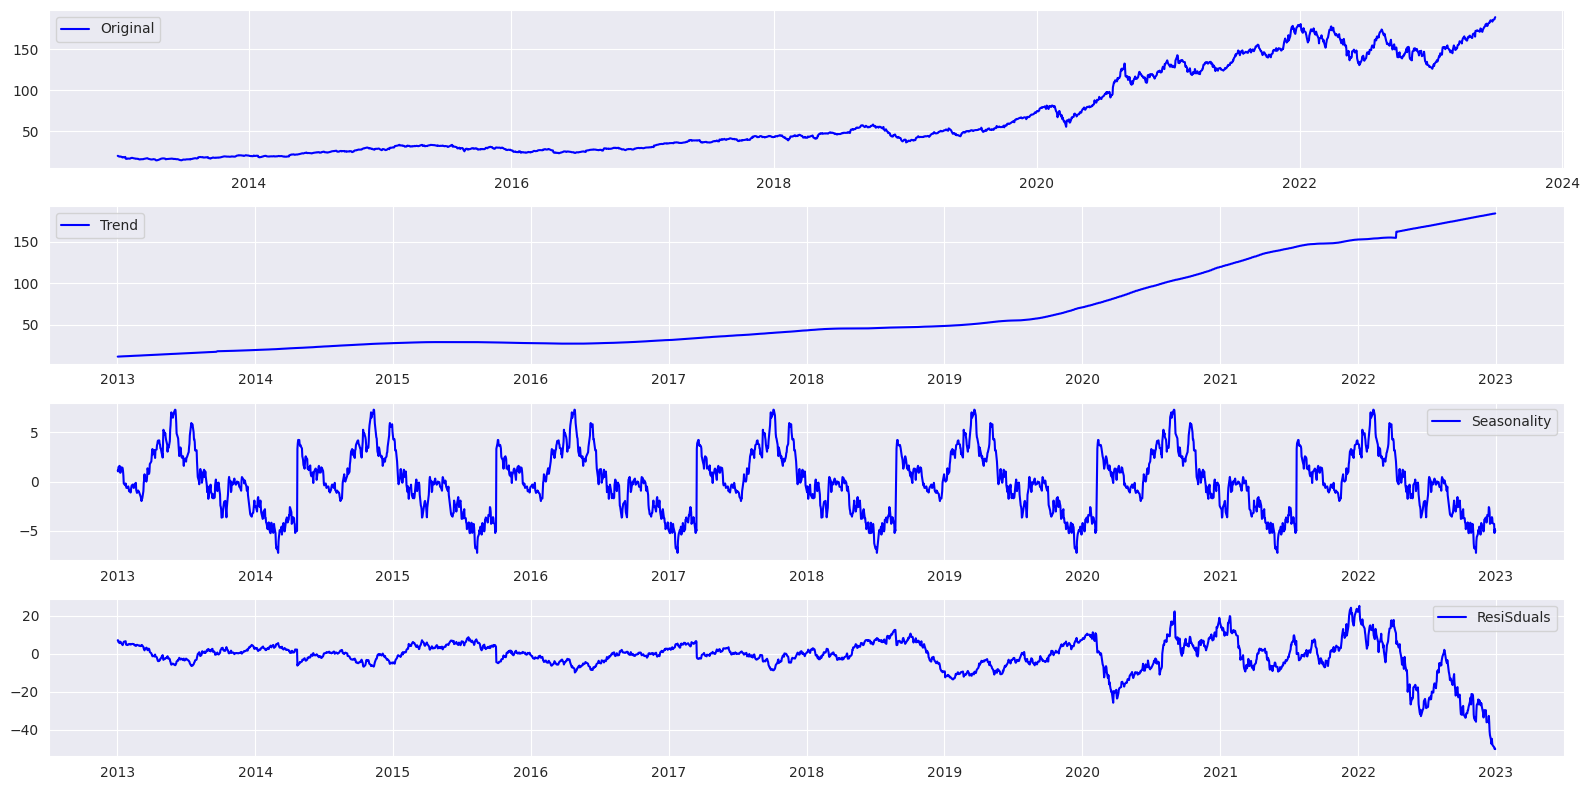

In [22]:
# ###Understanding the Time series data
# Decomposing Time Series into several components-Trend, Seasonality, and Random noise
#
# We know that Time series data is composed of Level, Trend, Seasonality, and Random noise. Let’s decompose the data and plot the trend, seasonality, and randomness in the data.
#
# We use statsmodel for seasonal decompose as an additive model and the frequency of the time series, which is the periodicity of the data, which is 365 days for yearly data.
#
# Additive model = Trend + Seasonality + Random Noise

from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(X['Mean'], model='add', period=365, extrapolate_trend='freq', two_sided=True, filt=None)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(16, 8))
plt.subplot(411)
plt.plot(df['Mean'], label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='ResiSduals', color='blue')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [32]:
###Check for Data Stationarity using Augmented Dickey-Fuller(ADF) test.

from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

def test_adf(series, title=''):
    dfout={}
    dftest = sm.tsa.adfuller(series.dropna(), autolag='AIC', regression='ct')
    for key,val in dftest[4].items():
        dfout[f'critical value ({key})']=val
    if dftest[1]<=0.05:
        print("Strong evidence against Null Hypothesis")
        print("Reject Null Hypothesis - Data is  Stationary")
        print("Data is Stationary", title)
    else:
        print("Strong evidence for  Null Hypothesis")
        print("Accept Null Hypothesis - Data is not Stationary")
        print("Data is NOT Stationary for", title)


In [33]:
#Checking for stationary in the data using the ADF test

y_test = y['Stock Price Next Day'][:train_size].dropna()
test_adf(y_test, 'Stock Price Next Day')

Strong evidence for  Null Hypothesis
Accept Null Hypothesis - Data is not Stationary
Data is NOT Stationary for Stock Price Next Day


In [34]:
#Make the data stationary by differencing the data

y_test_diff = y_test.diff().dropna()
test_adf(y_test_diff, 'Stock Price Next Day')

Strong evidence against Null Hypothesis
Reject Null Hypothesis - Data is  Stationary
Data is Stationary Stock Price Next Day


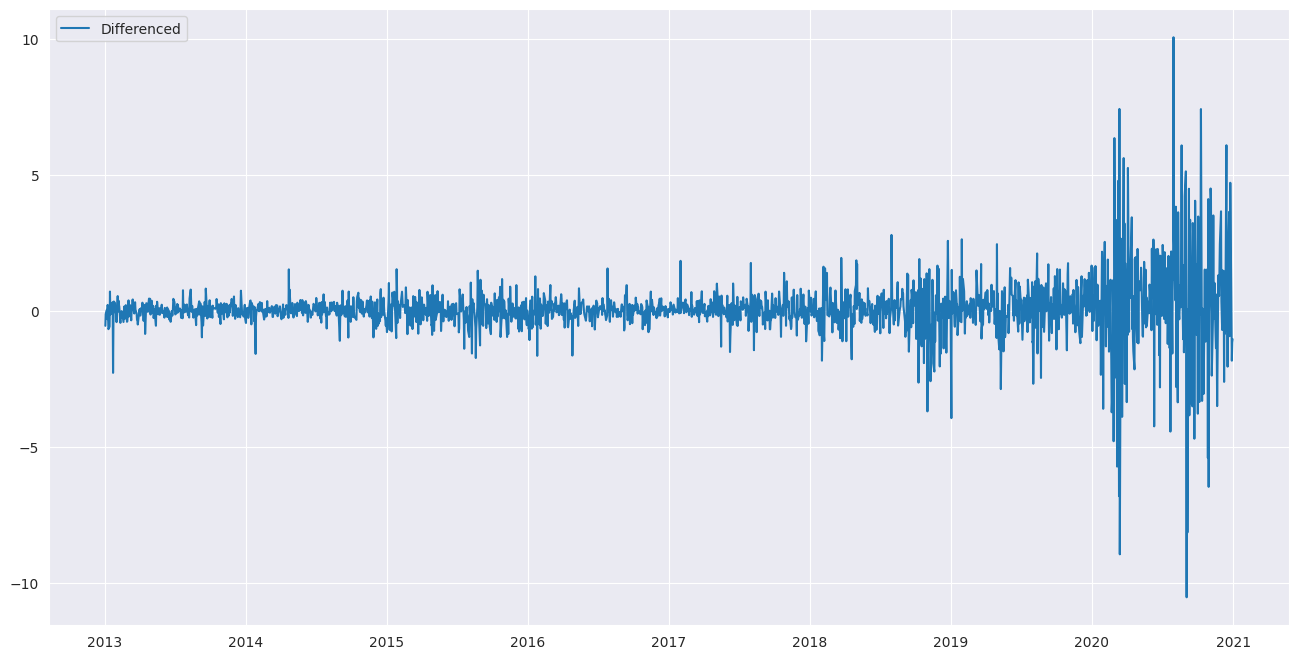

In [35]:
#Plotting the differenced data

plt.figure(figsize=(16, 8))
plt.plot(y_test_diff, label='Differenced')
plt.legend(loc='best')
plt.show()

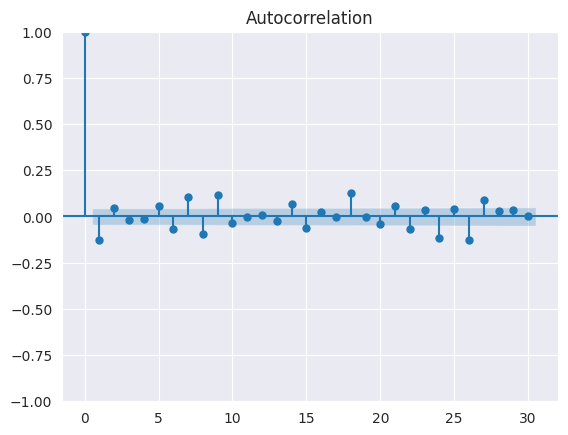

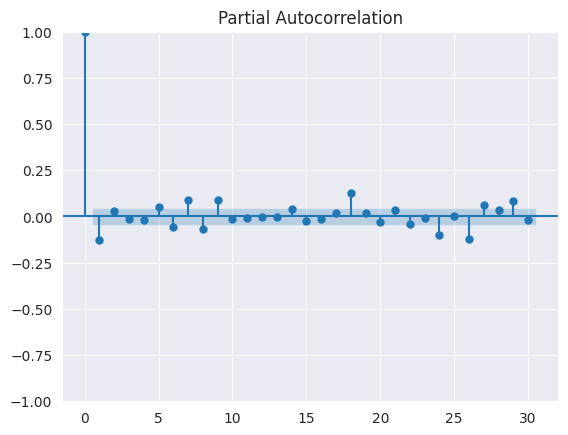

In [36]:
#Plotting the autocorrelation plot for the differenced data

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(y_test_diff, lags=30)
plot_pacf(y_test_diff, lags=30)
plt.show()

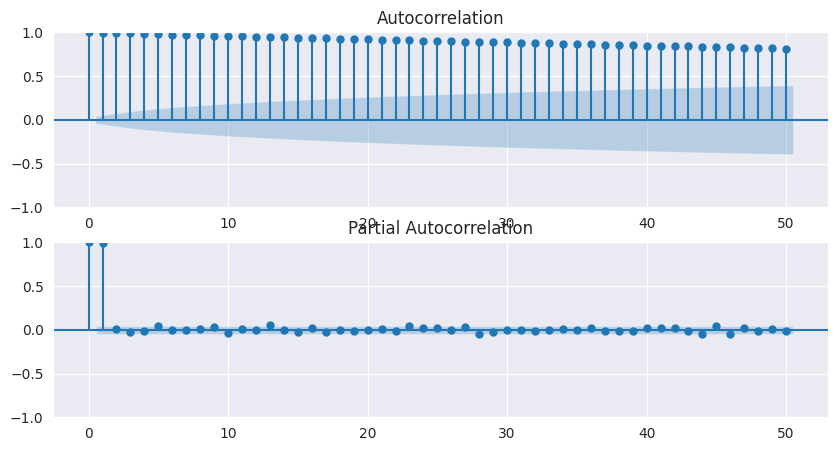

In [37]:
fig,ax= plt.subplots(2,1, figsize=(10,5))
fig=sm.tsa.graphics.plot_acf(y_test, lags=50, ax=ax[0])
fig=sm.tsa.graphics.plot_pacf(y_test, lags=50, ax=ax[1])
plt.show()

In [62]:
#Get the best parameters of seasonal orders for the SAIRMAX model using the auto_arima function from pmdarima library.

from pmdarima.arima import auto_arima

step_wise=auto_arima(train_Y, exogenous= train_X,
                       start_p=1, start_q=1, max_p=3, max_q=3, m=12,
                   start_P=0, seasonal=True, d=1, D=1, trace=True,
                   error_action='ignore', suppress_warnings=True,
                   stepwise=True)

step_wise.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=3.07 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=7242.125, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=6802.161, Time=0.27 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=2.23 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=7216.291, Time=0.07 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=6405.463, Time=0.83 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=4.46 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=1.95 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=6429.805, Time=0.70 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=6406.442, Time=1.10 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=6406.239, Time=1.45 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=6406.725, Time=0.85 sec
 ARIMA(2,1,1)(2,1,0)[12]             : AIC=6408.221, Time=3.42 sec
 ARIMA(1,1,0)(2,1,0)[12] intercept   : AIC=6407.340, Time=3.16 sec

Best model:  ARIMA(1,1,0)(2,1,0)[12]  

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 2014
Model:             SARIMAX(1, 1, 0)x(2, 1, 0, 12)   Log Likelihood               -3198.732
Date:                            Thu, 06 Jul 2023   AIC                           6405.463
Time:                                    13:18:05   BIC                           6427.869
Sample:                                         0   HQIC                          6413.690
                                           - 2014                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1149      0.010    -12.081      0.000      -0.133      -0.096
ar.S.L12      -0.6274      0.010    -65.266      0.000      -0.646      -0.609
ar.S.L24      -0.4338      0.009    -50.795      0.000      -0.451      -0.417
sigma2         1.4268      0.016     91.078      0.000       1.396       1.458
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             33358.01
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):              20.05   Skew:                            -0.47
Prob(H) (two-sided):                  0.00   Kurtosis:                        22.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Optimization terminated successfully.
         Current function value: 1.555103
         Iterations: 5
         Function evaluations: 521


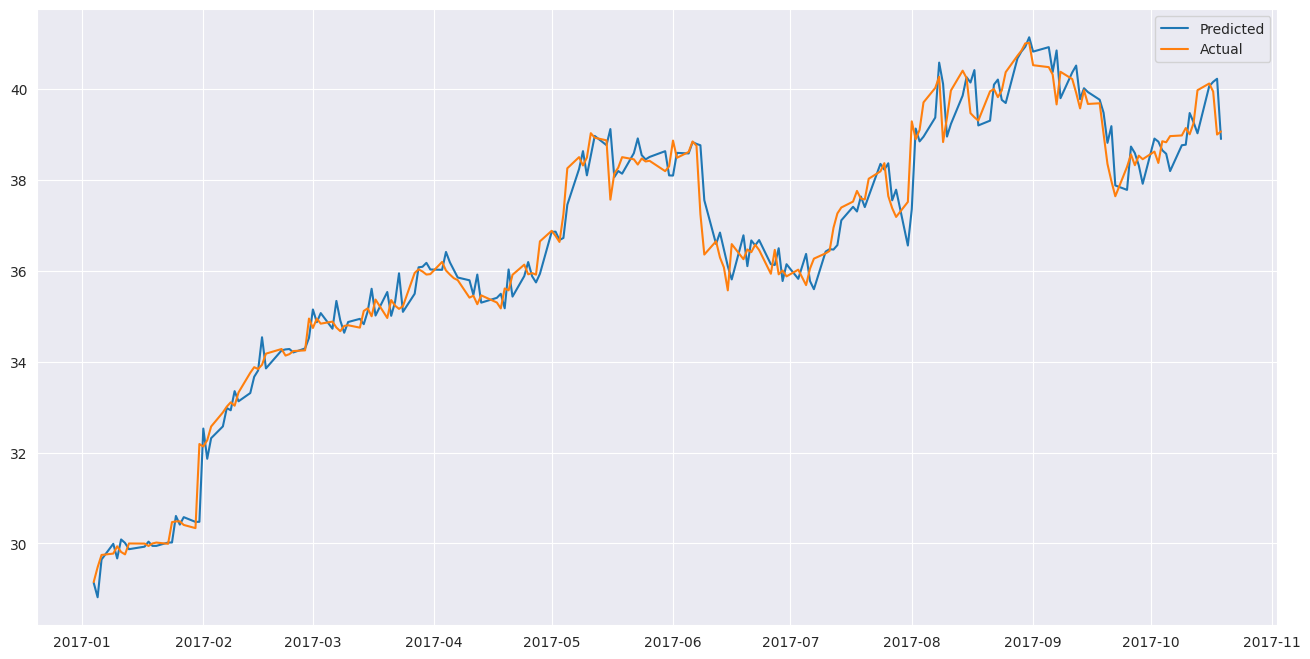

Mean Absolute Percentage Error:  0.00934476412426678
                  low       high       open      close       volume  \
date                                                                  
2013-01-02  19.343929  19.821428  19.779285  19.608213  560518000.0   
2013-01-03  19.321428  19.631071  19.567142  19.360714  352965200.0   
2013-01-04  18.779642  19.236786  19.177500  18.821428  594333600.0   
2013-01-07  18.400000  18.903570  18.642857  18.710714  484156400.0   
2013-01-08  18.616072  18.996071  18.900356  18.761070  458707200.0   
...               ...        ...        ...        ...          ...   
2017-10-13  39.102501  39.320000  39.182499  39.247501   65576800.0   
2017-10-16  39.412498  40.000000  39.474998  39.970001   96486000.0   
2017-10-17  39.807499  40.217499  39.945000  40.117500   75989200.0   
2017-10-18  39.900002  40.177502  40.105000  39.939999   65496800.0   
2017-10-19  38.755001  39.270000  39.187500  38.994999  170336800.0   

            adj_close  

/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 1.555103
         Iterations: 5
         Function evaluations: 521


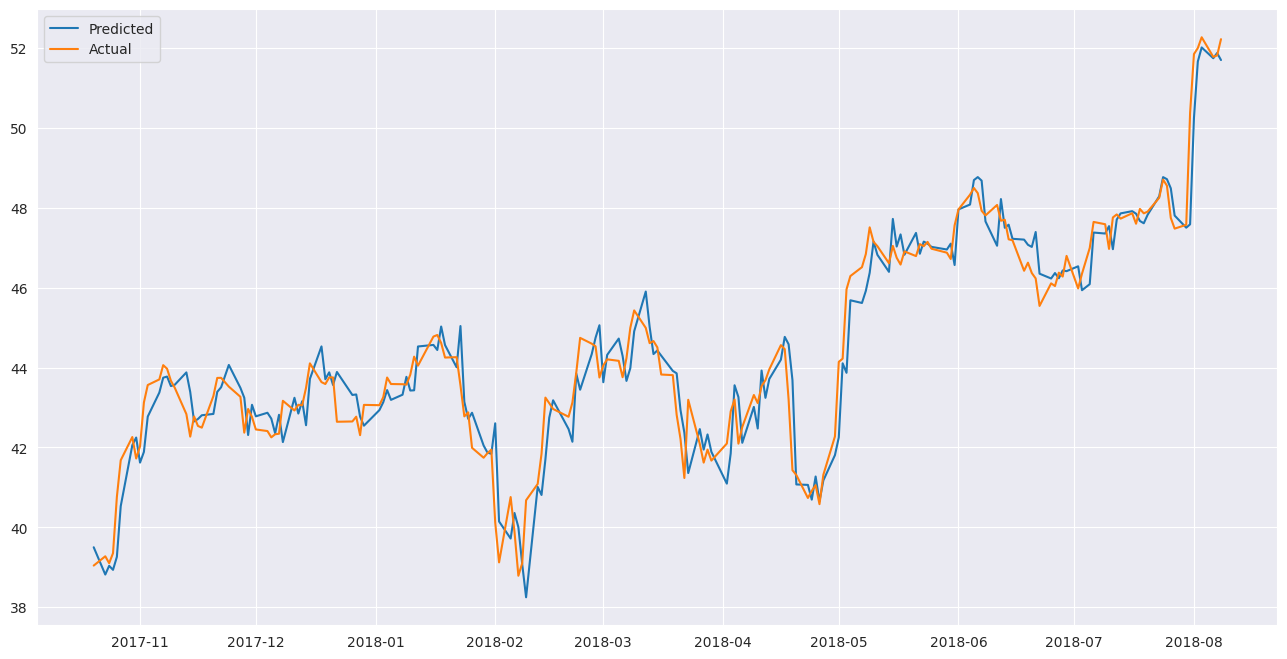

Mean Absolute Percentage Error:  0.011968349382552465
                  low       high       open      close       volume  \
date                                                                  
2013-01-02  19.343929  19.821428  19.779285  19.608213  560518000.0   
2013-01-03  19.321428  19.631071  19.567142  19.360714  352965200.0   
2013-01-04  18.779642  19.236786  19.177500  18.821428  594333600.0   
2013-01-07  18.400000  18.903570  18.642857  18.710714  484156400.0   
2013-01-08  18.616072  18.996071  18.900356  18.761070  458707200.0   
...               ...        ...        ...        ...          ...   
2018-08-02  50.087502  52.095001  50.145000  51.847500  249616000.0   
2018-08-03  51.369999  52.185001  51.757500  51.997501  133789600.0   
2018-08-06  51.767502  52.312500  52.000000  52.267502  101701600.0   
2018-08-07  51.689999  52.375000  52.330002  51.777500  102349600.0   
2018-08-08  51.130001  51.952499  51.512501  51.812500   90102000.0   

            adj_close 

/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 1.555103
         Iterations: 5
         Function evaluations: 521


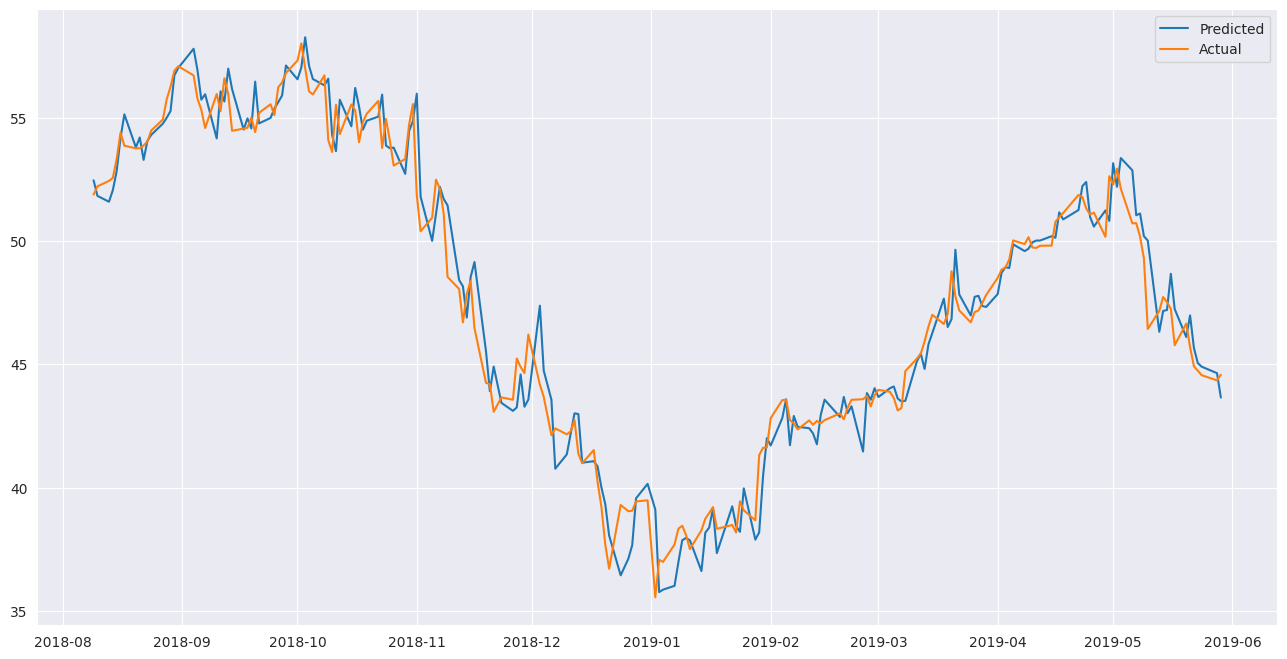

Mean Absolute Percentage Error:  0.01829935840866422
                  low       high       open      close       volume  \
date                                                                  
2013-01-02  19.343929  19.821428  19.779285  19.608213  560518000.0   
2013-01-03  19.321428  19.631071  19.567142  19.360714  352965200.0   
2013-01-04  18.779642  19.236786  19.177500  18.821428  594333600.0   
2013-01-07  18.400000  18.903570  18.642857  18.710714  484156400.0   
2013-01-08  18.616072  18.996071  18.900356  18.761070  458707200.0   
...               ...        ...        ...        ...          ...   
2019-05-22  45.637501  46.427502  46.165001  45.695000  118994400.0   
2019-05-23  44.452499  45.134998  44.950001  44.915001  146118800.0   
2019-05-24  44.654999  45.535000  45.049999  44.742500   94858800.0   
2019-05-28  44.477501  45.147499  44.730000  44.557499  111792800.0   
2019-05-29  44.000000  44.837502  44.105000  44.345001  113924800.0   

            adj_close  

/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 1.555103
         Iterations: 5
         Function evaluations: 521


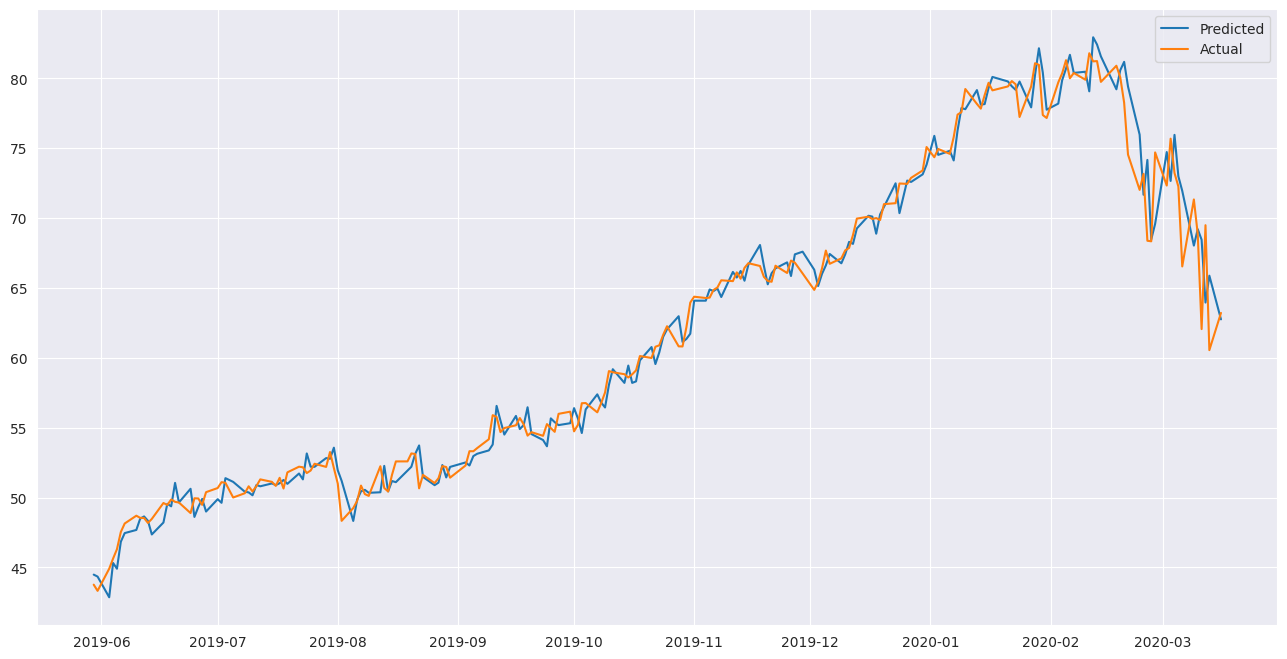

Mean Absolute Percentage Error:  0.016441193905423503
                  low       high       open      close       volume  \
date                                                                  
2013-01-02  19.343929  19.821428  19.779285  19.608213  560518000.0   
2013-01-03  19.321428  19.631071  19.567142  19.360714  352965200.0   
2013-01-04  18.779642  19.236786  19.177500  18.821428  594333600.0   
2013-01-07  18.400000  18.903570  18.642857  18.710714  484156400.0   
2013-01-08  18.616072  18.996071  18.900356  18.761070  458707200.0   
...               ...        ...        ...        ...          ...   
2020-03-10  67.342499  71.610001  69.285004  71.334999  285290000.0   
2020-03-11  67.964996  70.305000  69.347504  68.857498  255598800.0   
2020-03-12  62.000000  67.500000  63.985001  62.057499  418474000.0   
2020-03-13  63.237499  69.980003  66.222504  69.492500  370732000.0   
2020-03-16  60.000000  64.769997  60.487499  60.552502  322423600.0   

            adj_close 

/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 1.555103
         Iterations: 5
         Function evaluations: 521


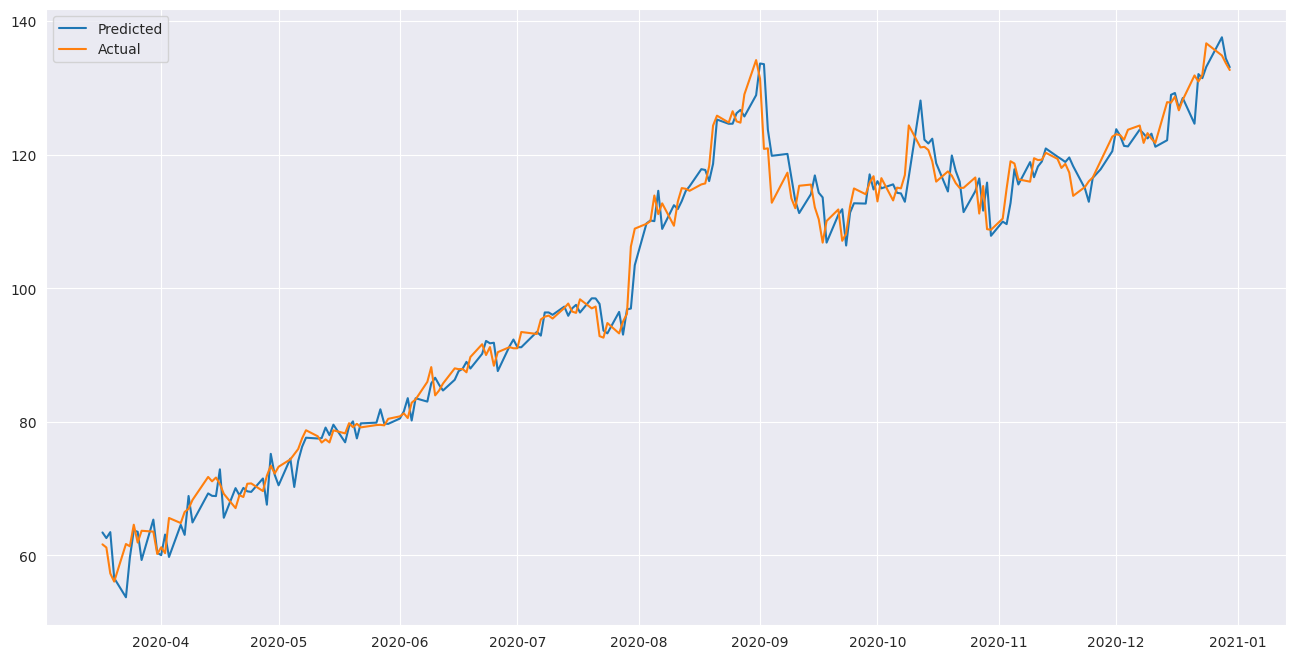

Mean Absolute Percentage Error:  0.022150612321278663


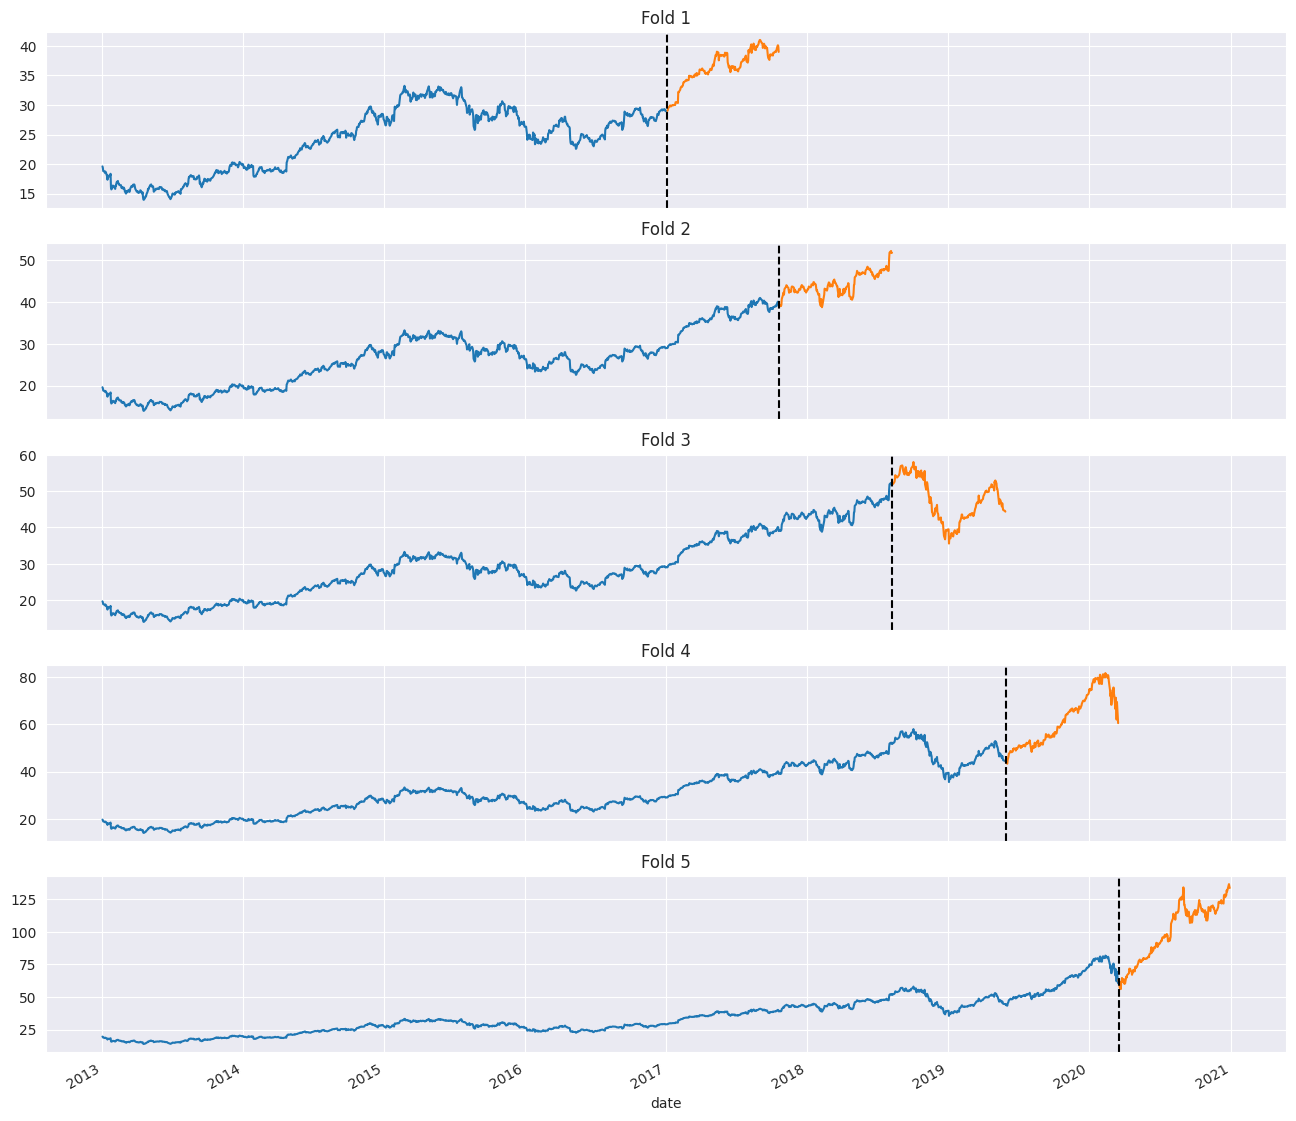

/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 1.555103
         Iterations: 5
         Function evaluations: 521


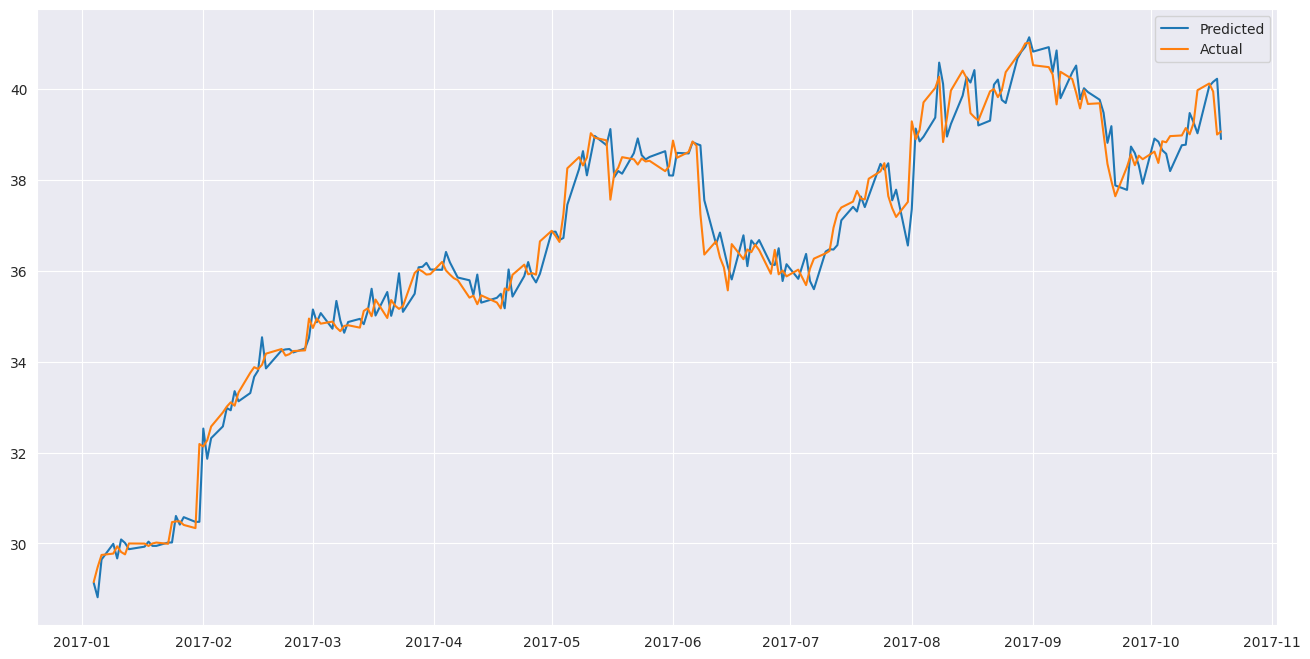

Mean Absolute Percentage Error:  0.00934476412426678


/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 1.555103
         Iterations: 5
         Function evaluations: 521


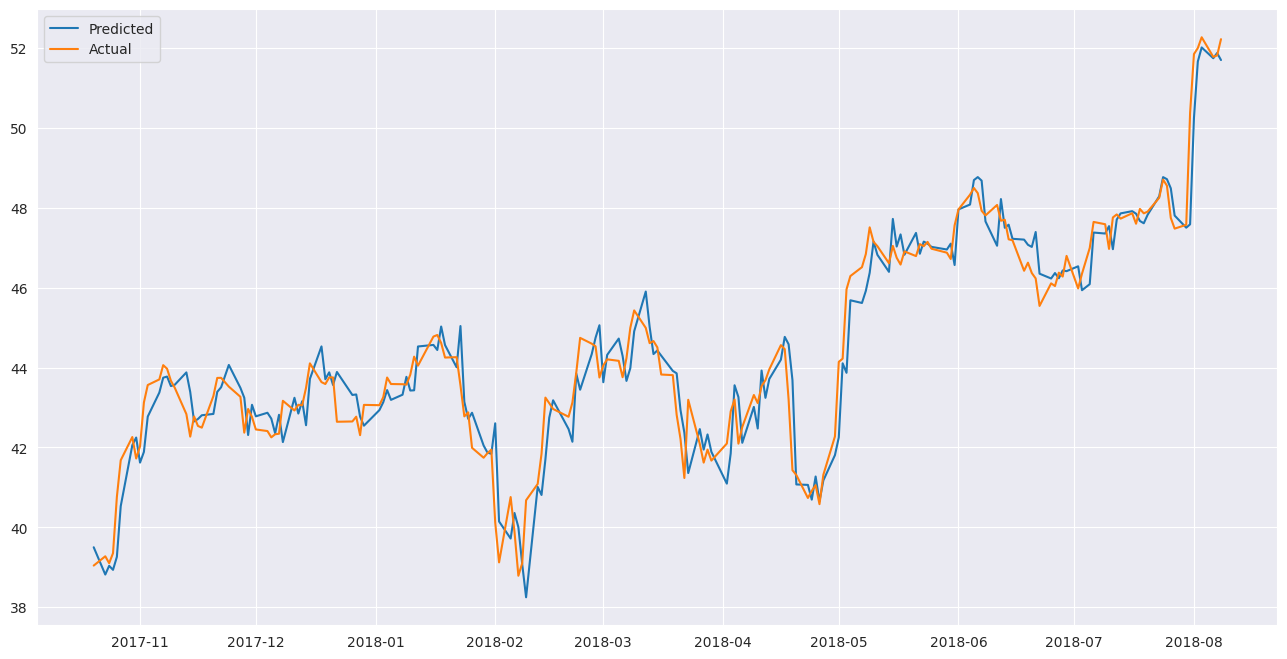

Mean Absolute Percentage Error:  0.011968349382552465


/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 1.555103
         Iterations: 5
         Function evaluations: 521


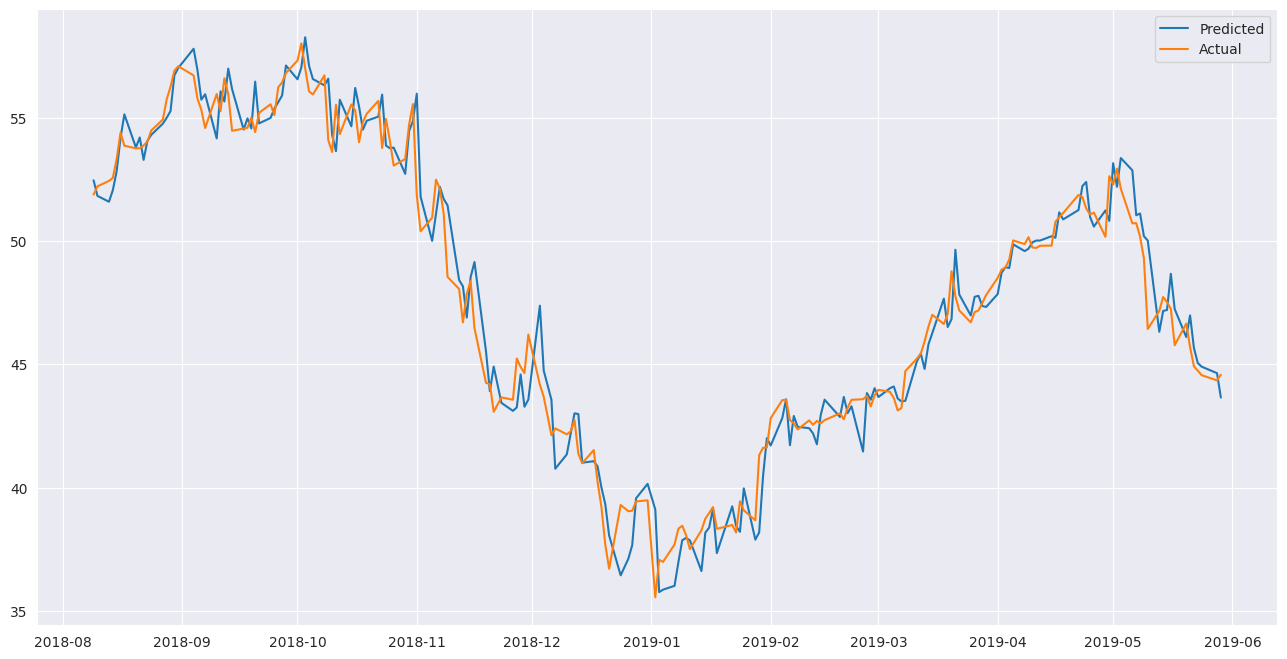

Mean Absolute Percentage Error:  0.01829935840866422


/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 1.555103
         Iterations: 5
         Function evaluations: 521


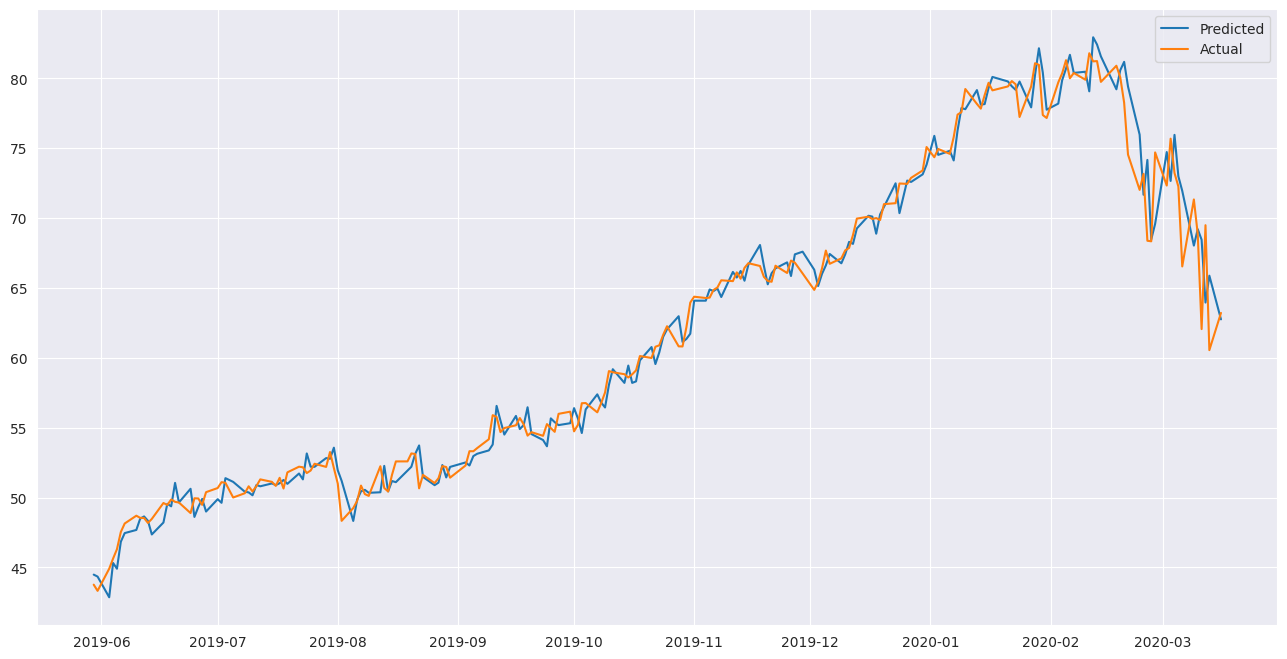

Mean Absolute Percentage Error:  0.016441193905423503


/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 1.555103
         Iterations: 5
         Function evaluations: 521


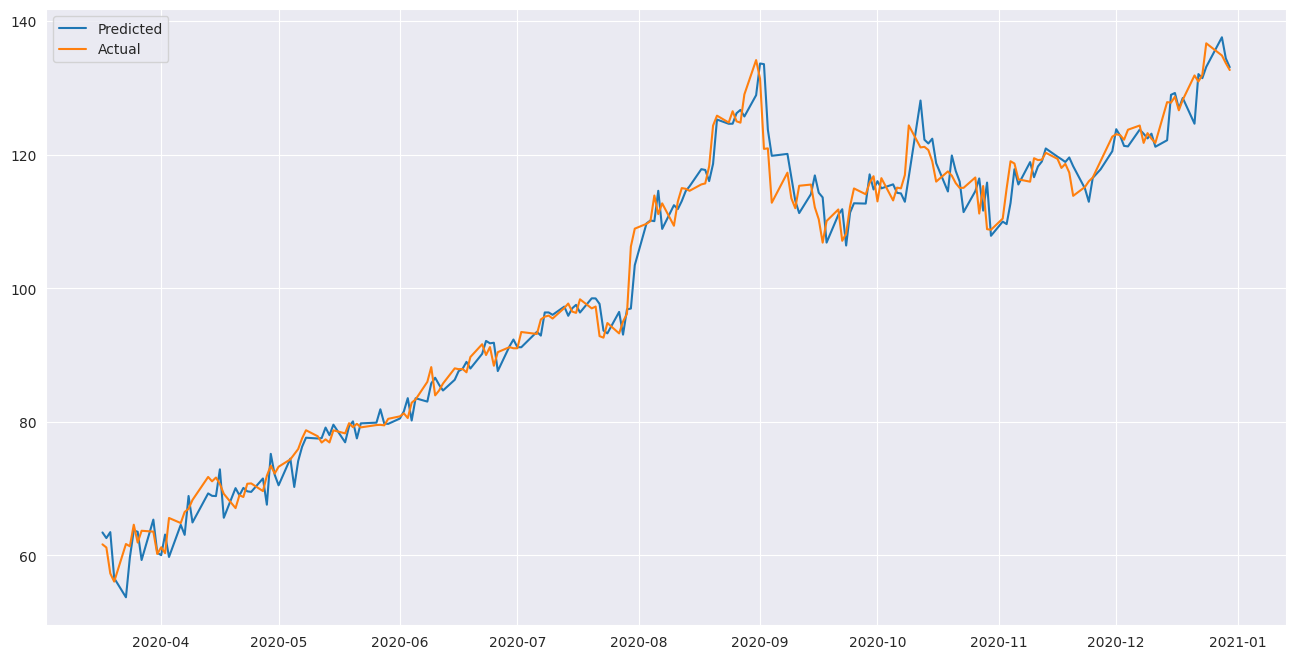

Mean Absolute Percentage Error:  0.022150612321278663


In [139]:
import warnings
#Time series cross validation using TimeSeriesSplit from sklearn.model_selection library and mean_absolute_percentage_error from sklearn.metrics library. We use the SARIMAX model to fit the data and predict the values for the test data. We then calculate the mean
#absolute percentage error for the predicted values and the actual values. We then plot the predicted values and the actual values. We also plot the residuals of the model.

from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)

total_samples = len(train_X)  # Mỗi mẫu tương ứng với một năm

test_size_ratio = 0.1  # Tỷ lệ phần trăm dùng cho tập kiểm tra
test_size = int(total_samples * test_size_ratio)

# n_splits = total_samples - test_size

tscv = TimeSeriesSplit(n_splits=5, test_size=test_size, gap=0)

train_X = train_X.sort_index()
train_Y = train_Y.sort_index()
# print(train_X.head())
figure, ax = plt.subplots(5, 1 , figsize=(16, 15), sharex=True)
fold = 0

for train_index, test_index in tscv.split(train_X):
    X_train, X_test = train_X.iloc[train_index], train_X.iloc[test_index]
    y_train, y_test = train_Y.iloc[train_index], train_Y.iloc[test_index]

    X_train["close"].plot(ax=ax[fold], label='Training Set', title='Fold {}'.format(fold+1))
    X_test["close"].plot(ax=ax[fold], label='Test Set')
    ax[fold].axvline(X_test.index.min(), color='black', ls='--')
    fold+= 1
plt.show()

for train_index, test_index in tscv.split(train_X):
    X_train, X_test = train_X.iloc[train_index], train_X.iloc[test_index]
    y_train, y_test = train_Y.iloc[train_index], train_Y.iloc[test_index]

    # model = SARIMAX(endog=y_train, exog=X_train, order=(0, 1, 3), seasonal_order=(1,1,2,12), enforce_invertibility=False, enforce_stationarity=False)
    model = SARIMAX(endog=train_Y, exog=train_X, order=(1, 1, 0), seasonal_order=(2,1,0,12), enforce_invertibility=False, enforce_stationarity=False)

    model_fit = model.fit(maxiter=200, method='powell', disp=True, full_output=True)
    y_pred = model_fit.predict(start=test_index[0], end=test_index[-1], exog=X_test)

    #plot the predicted and actual values from y_pred and x_test
    y_pred.reset_index(drop=True, inplace=True)
    y_pred.index=X_test.index

    plt.figure(figsize=(16, 8))
    plt.plot(y_pred, label='Predicted')
    plt.plot(y_test, label='Actual')
    plt.legend(loc='best')
    plt.show()

    print("Mean Absolute Percentage Error: ", mean_absolute_percentage_error(y_test, y_pred))

In [53]:
#Predicting the values in the validation data using the SARIMAX model
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(endog=train_Y, exog=train_X, order=(1, 1, 0), seasonal_order=(2,1,0,12), enforce_invertibility=False, enforce_stationarity=False)

model_fit = model.fit(maxiter=200, method='powell', disp=True, full_output=True)
print(model_fit.summary())

/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 1.555103
         Iterations: 5
         Function evaluations: 521
                                     SARIMAX Results                                      
Dep. Variable:         Stock Close Price Next Day   No. Observations:                 2014
Model:             SARIMAX(1, 1, 0)x(2, 1, 0, 12)   Log Likelihood               -3131.978
Date:                            Thu, 06 Jul 2023   AIC                           6287.956
Time:                                    14:29:03   BIC                           6355.022
Sample:                                         0   HQIC                          6312.596
                                           - 2014                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------

In [52]:
#Forecast the values in the validation data using the SARIMAX model from 01-07-2023 to 01-07-2024
# print(df_for_validation.shape)
# df_for_validation.head(2)
forecast = model_fit.forecast(steps=1, signal_only=True, exog = df_for_validation["close"].iloc[1])

/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


ValueError: Provided exogenous values are not of the appropriate shape. Required (1, 8), got ().

In [40]:
#Plotting the forecasted values
# print(forecast.index)
forecast_apple= pd.DataFrame(forecast)
forecast_apple.reset_index(drop=True, inplace=True)
forecast_apple.index=df_for_validation_actual.iloc[1].index
forecast_apple["Actual"] =df_for_validation_actual.iloc[1]
forecast_apple.rename(columns={0:"Forecast"}, inplace=True)

print(forecast_apple)

          Forecast      Actual
Actual  169.789205  125.019997


<Axes: >

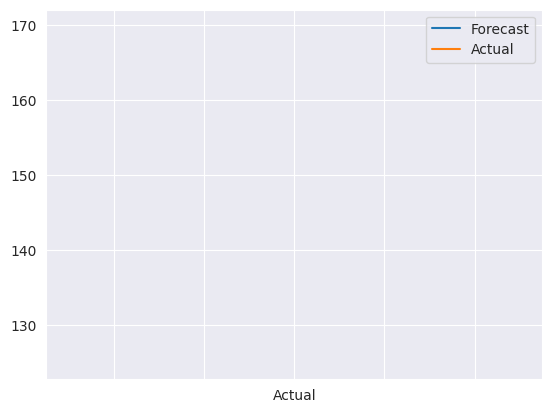

In [39]:
forecast_apple["Forecast"].plot(legend=True)
forecast_apple["Actual"].plot(legend=True)

In [136]:
from statsmodels.tools.eval_measures import rmse
error=rmse(forecast_apple["predicted_mean"], forecast_apple["Actual"])
error

7.636961360120501

In [54]:
#Predict the values in the test data using the SARIMAX model from 01-07-2023 to 01-07-2024
prediction = model_fit.predict(start_date=pd.to_datetime('2023-07-01'), end_date=pd.to_datetime('2023-07-31'), exog = )

In [55]:


predictions=pd.DataFrame(prediction)
print(predictions)
# predictions.reset_index(drop=True, inplace=True)
# # predictions.index=df_for_validation.index
# # predictions['Actual'] = act['Stock Price Next Day']
# predictions.rename(columns={0:'Pred'}, inplace=True)

            predicted_mean
date                      
2013-01-02       -4.022349
2013-01-03       19.221751
2013-01-04       18.902140
2013-01-07       18.702669
2013-01-08       18.752722
...                    ...
2020-12-23      131.472038
2020-12-24      133.161829
2020-12-28      137.593334
2020-12-29      134.429556
2020-12-30      133.103364

[2014 rows x 1 columns]


In [63]:
model = SARIMAX(df['close'], order=(1,1,0), seasonal_order=(2,1,0,12)).fit(maxiter=200, method='powell', disp=True, full_output=True)

# Make predictions
start_date = pd.to_datetime('2023-06-29')
end_date = pd.to_datetime('2023-07-11')
predictions = model.predict(start=start_date, end=end_date)

/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 2.037908
         Iterations: 2
         Function evaluations: 91


KeyError: 'The `end` argument could not be matched to a location related to the index of the data.'

In [57]:
df.tail()

,symbol,high,low,open,close,adj_close,volume,tema_100,Mean
date,,,,,,,,,
2023-06-23,AAPL,187.559998,185.009995,185.550003,186.679993,186.679993,53079300.0,185.522576,186.284996
2023-06-26,AAPL,188.050003,185.229996,186.830002,185.270004,185.270004,48088700.0,185.999949,186.639999
2023-06-27,AAPL,188.389999,185.669998,185.889999,188.059998,188.059998,50730800.0,186.613868,187.029999
2023-06-28,AAPL,189.899994,187.600006,187.929993,189.250000,189.250000,51216800.0,187.265740,188.750000
2023-06-29,AAPL,190.070007,188.940002,189.080002,189.589996,189.589996,46126000.0,187.904492,189.505005
